In [1]:
import yaml
import awkward as aw
import uproot
import matplotlib.pyplot as plt
import pandas as pd
import mplhep as hep
import seaborn as sns
import pandas as pd
import numpy as np
from util import significance
hep.style.use(hep.style.ATLAS)

In [2]:
with open('config.yaml') as conf_file:
    config = yaml.load(conf_file, Loader=yaml.Loader) 
do_cut=0

In [3]:
variables = ["jet1_pt", "jet1_eta", "jet1_phi", "jet1_e", "jet2_pt", "jet2_eta", "jet2_phi", "jet2_e", 
            "njet30", "mjj", "detajj", "signetajj", "dphijj", "MET", "weight",
            #  "dphi_j1met", "min_dphi_jetmet", 
            # "nLJ20", "nLJjets20", "LJjet1_pt", "LJjet1_eta", "LJjet1_phi", "LJjet1_m", 
            # "LJjet1_width", "LJjet1_EMfrac", "LJjet1_timing", "LJjet1_jvt", "LJjet1_gapRatio", "LJjet1_BIBtagger", 
            # "LJjet1_DPJtagger", "LJjet1_truthDPidx", "nLJmus20", "MET", "METsig", "METOSqrtHT", "nLJmus20", 
            # "neleSignal", "nmuSignal", "neleBaseline", "nmuBaseline", "hasBjet", "metTrig",
            # "LJjet1_isoID",
            # "scale1fb", "intLumi",
             "centrality"
]

In [4]:
do_cut = 0
with_VBF_cut = False
if with_VBF_cut:
    VBF_cut = '_with_VBF_cut'
else:
    VBF_cut = '_without_VBF_cut'

In [5]:
file = uproot.open(f"output/xgboost/VBF_500757_0_cuts_without_VBF_cut.root") # change to 0 - sebastian
tree = file["miniT"]
array = tree.arrays(variables, library="ak")

In [6]:
datasets = ["VBF_500757", "VBF_500758", "VBF_500759", "VBF_500760", "VBF_500761", "VBF_500762", "VBF_500763", "VBF_500764", "QCD", "TOP", 
            "Wjets", "Wjj", "Zjets", "Zjj", "diboson"]

# for data in datasets:
for data in config['ttree']['files'].keys():
    file = uproot.open(f"output/xgboost/{data}_{do_cut}_cuts{VBF_cut}.root") # change to 0 - sebastian
    tree = file["miniT"]
    array = tree.arrays(variables, library="ak")
    #weight = tree.arrays("scale1fb*intLumi", library="ak")
    # transform to pandas dataframe
    temp_pd = aw.to_dataframe(array)
    # create dataframe with columns instead of multientries
    temp_df = pd.DataFrame(temp_pd).reset_index()
    # remove first column
    temp_df.drop(['entry'], axis=1, inplace=True)
    # add weight
    # temp_df['weight'] = temp_df['scale1fb']*temp_df['intLumi']
    # multiply (GeV) variables by 0.001
    temp_df['jet1_pt'] = temp_df['jet1_pt']*0.001
    temp_df['jet2_pt'] = temp_df['jet2_pt']*0.001
    temp_df['jet1_e'] = temp_df['jet1_e']*0.001
    temp_df['jet2_e'] = temp_df['jet2_e']*0.001
    # temp_df['LJjet1_pt'] = temp_df['LJjet1_pt']*0.001
    # temp_df['LJjet1_m'] = temp_df['LJjet1_pt']*0.001
    temp_df['MET'] = temp_df['MET']*0.001
    temp_df['mjj'] = temp_df['mjj']*0.001
    # temp_df['LJjet1_isoID'] = temp_df['LJjet1_isoID']*0.001
    # add cumulative number of events after each event bin
    #temp_df['n_ev'] = temp_df['weight'].cumsum()
    # create dataframe for each process
    if data == 'VBF_500757': df_VBF_500757 = temp_df
    if data == 'VBF_500758': df_VBF_500758 = temp_df   
    if data == 'VBF_500759': df_VBF_500759 = temp_df   
    if data == 'VBF_500760': df_VBF_500760 = temp_df   
    if data == 'VBF_500761': df_VBF_500761 = temp_df   
    if data == 'VBF_500762': df_VBF_500762 = temp_df   
    if data == 'VBF_500763': df_VBF_500763 = temp_df   
    if data == 'VBF_500764': df_VBF_500764 = temp_df

    if data == 'GGF_508885': df_GGF_508885 = temp_df
    if data == 'GGF_508886': df_GGF_508886 = temp_df
    if data == 'GGF_508887': df_GGF_508887 = temp_df
    if data == 'GGF_508888': df_GGF_508888 = temp_df
    if data == 'GGF_508889': df_GGF_508889 = temp_df
    if data == 'GGF_508890': df_GGF_508890 = temp_df
    if data == 'GGF_508891': df_GGF_508891 = temp_df
    if data == 'GGF_508892': df_GGF_508892 = temp_df
    if data == 'GGF_508893': df_GGF_508893 = temp_df
    
    
    if data == 'QCD': df_QCD = temp_df
    if data == 'TOP': df_top = temp_df
    if data == 'Wjj': df_Wjj = temp_df
    if data == 'Wjets': df_Wjets = temp_df  
    if data == 'Zjj': df_Zjj = temp_df
    if data == 'Zjets': df_Zjets = temp_df
    if data == 'diboson': df_diboson = temp_df

In [7]:
#add a new column called "sample" to the dataframe
df_VBF_500757['sample'] = 'VBF 0.1GeV, 15mm'
df_VBF_500758['sample'] = 'VBF 0.4GeV, 50mm'
df_VBF_500759['sample'] = 'VBF 0.4GeV, 5mm'
df_VBF_500760['sample'] = 'VBF 0.4GeV, 500mm'
df_VBF_500761['sample'] = 'VBF 10GeV, 900mm'
df_VBF_500762['sample'] = 'VBF 15GeV, 1000mm'
df_VBF_500763['sample'] = 'VBF 10GeV, 900mm'
df_VBF_500764['sample'] = 'VBF 15GeV, 1000mm'
df_GGF_508885['sample'] = "GGF"
df_GGF_508886['sample'] = "GGF"
df_GGF_508887['sample'] = "GGF"
df_GGF_508888['sample'] = "GGF"
df_GGF_508889['sample'] = "GGF"
df_GGF_508890['sample'] = "GGF"
df_GGF_508891['sample'] = "GGF"
df_GGF_508892['sample'] = "GGF"
df_GGF_508893['sample'] = "GGF"
# df_QCD['sample'] = 'QCD'
# df_top['sample'] = 'top'
# df_Wjj['sample'] = 'Wjj'
# df_Wjets['sample'] = 'Wjets'
# df_Zjj['sample'] = 'Zjj'
# df_Zjets['sample'] = 'Zjets'
# df_diboson['sample'] = 'diboson'

In [8]:
#combine all dataframes into one
df_all = pd.concat([df_VBF_500757, df_VBF_500758, df_VBF_500759, df_VBF_500760, df_VBF_500761, df_VBF_500762, df_VBF_500763, df_VBF_500764, df_GGF_508885, df_GGF_508886, df_GGF_508887, df_GGF_508888, df_GGF_508889, df_GGF_508890, df_GGF_508891, df_GGF_508892, df_GGF_508893], ignore_index=True)
#combine signal dataframes into one
df_signal = pd.concat([df_VBF_500757, df_VBF_500758, df_VBF_500759, df_VBF_500760, df_VBF_500761, df_VBF_500762, df_VBF_500763, df_VBF_500764], ignore_index=True)
#combine background dataframes into one
df_background = pd.concat([df_GGF_508885, df_GGF_508886, df_GGF_508887, df_GGF_508888, df_GGF_508889, df_GGF_508890, df_GGF_508891, df_GGF_508892, df_GGF_508893], ignore_index=True)
#combine VBF 500757 and all backgrounds into one
# df_VBF_500757_all = pd.concat([df_VBF_500757, df_QCD, df_top, df_Wjj, df_Wjets, df_Zjj, df_Zjets, df_diboson], ignore_index=True)
#df_test = pd.concat([df_VBF_500757, df_QCD, df_top, df_Wjj, df_Wjets, df_Zjj, df_Zjets, df_diboson], ignore_index=True)
df_test = pd.concat([df_VBF_500757, df_background], ignore_index=True)
# create a new dataframe with sum of all backgrounds


In [9]:
print(f"mc VBF events: {len(df_signal)}")
print(f"mc ggF events: {len(df_background)}")
print(f"weighted VBF events: {np.sum(df_signal['weight'])}")
print(f"weighted ggF events: {np.sum(df_background['weight'])}")


mc VBF events: 491733
mc ggF events: 4136843
weighted VBF events: 10895.0830078125
weighted ggF events: 6074545.5


In [10]:
df_signal["sample"] = "VBF"
df_background["sample"] = "GGF"
df_test = pd.concat([df_signal, df_background], ignore_index=True)

In [11]:
# #test
# ncuts = 100

# # y_pred_sgn = df_VBF_500757['LJjet1_isoID']
# w_sgn = df_VBF_500757['weight']
# y_pred_bkg = df_background['LJjet1_isoID']
# w_bkg = df_background['weight']
# ar_mjj = []
# for i in range(ncuts + 1):
#     cut = 150*i/ncuts
#     test = y_pred_sgn
#     datos_sgn = w_sgn[y_pred_sgn >= cut]
#     datos_bkg = w_bkg[y_pred_bkg >= cut]
#     s = np.sum(datos_sgn)
#     b = np.sum(datos_bkg)
#     if s > 1 and b > 1:
#         sig = significance(s, b)
#         ar_mjj.append(cut)
#         ar_mjj.append(s)
#         ar_mjj.append(b)
#         ar_mjj.append(sig)
#     print(f"{cut = }, signal = {s}, background = {b}, significance = {sig}")

In [12]:
r_detajj = (0,9)
r_mjj = (0,4000)
r_met = (0,600)
r_jet1_pt = (0, 500)
r_jet2_pt = (0,500)
r_jet1_e = (0,4000)
r_jet2_e = (0,4000)
r_jet_eta = (-5,5)
r_jet_phi = (-3.2, 3.2)

In [13]:
def puntaje_corte(s_as_s, s, b_as_b,b):
    # fraccion de señal bien identificada
    x = s_as_s/s
    #fraccion de background bien identificada
    y = b_as_b/b
    #distancia al punto maximo
    r = np.sqrt((1-x)**2 + (1-y)**2)
    # 1-r porque queremos que el puntaje aumente pare mejores cortes
    # mejor puntaje sera 1, el peor sera 0
    return 1-r, x, y
def calc_significance(var):
    ncuts = 100
    if var == 'njet30': ncuts = 7
    # elif var == 'neleSignal': ncuts = 3
    # elif var == 'nmuSignal': ncuts = 3
    # elif var == 'nLJmus20': ncuts = 2
    # elif var == 'nLJjets20': ncuts = 6
    #elif var == 'LJjet1_isoID': ncuts = 150
    else: ncuts = 100

    y_pred_sgn = df_signal[var]
    w_sgn = df_signal['weight']
    y_pred_bkg = df_background[var]
    w_bkg = df_background['weight']
    ar = []
    for i in range(ncuts + 1):
        #define cut and then for each condition
        cut = 1*i/ncuts
        min_cut = -100
        if var == 'mjj': 
            cut = r_mjj[0] + (r_mjj[1]-r_mjj[0])*i/ncuts
            min_cut = 0
        elif var == 'njet30': cut = 7*i/ncuts
        elif var == 'detajj': cut = r_detajj[0] + (r_detajj[1]-r_detajj[0])*i/ncuts
        elif var == 'MET': 
            cut = r_met[0] + (r_met[1]- r_met[0])*i/ncuts
            min_cut = 0
        # elif var == 'neleSignal': cut = 3*i/ncuts
        # elif var == 'nmuSignal': cut = 3*i/ncuts
        # elif var == 'nLJmus20': cut = 2*i/ncuts
        # elif var == 'nLJjets20': cut = 6*i/ncuts
        # elif var == 'min_dphi_jetmet': cut = 3.2*i/ncuts
        elif var == 'dphijj': cut = -3.2+6.4*i/ncuts
        elif var == "centrality": 
            cut = 1*i/ncuts
            min_cut = 0
        elif var == "jet1_pt": 
            cut = r_jet1_pt[0] + (r_jet1_pt[1]- r_jet1_pt[0])*i/ncuts
            min_cut = 0
        elif var == "jet2_pt": 
            cut = r_jet2_pt[0] + (r_jet2_pt[1]- r_jet2_pt[0])*i/ncuts
            min_cut = 0
        elif var == "jet1_e": 
            cut = r_jet1_e[0] + (r_jet1_e[1]- r_jet1_e[0])*i/ncuts
            min_cut = 0
        elif var == "jet2_e": 
            cut = r_jet2_e[0] + (r_jet2_e[1]- r_jet2_e[0])*i/ncuts
            min_cut = 0
        elif var == "jet1_eta": 
            cut = r_jet_eta[0] + (r_jet_eta[1]- r_jet_eta[0])*i/ncuts
            min_cut = -100
        elif var == "jet2_eta": 
            cut = r_jet_eta[0] + (r_jet_eta[1]- r_jet_eta[0])*i/ncuts
            min_cut = -100
        elif var == "jet1_phi": 
            cut = r_jet_phi[0] + (r_jet_phi[1]- r_jet_phi[0])*i/ncuts
            min_cut = -100
        elif var == "jet2_phi": 
            cut = r_jet_phi[0] + (r_jet_phi[1]- r_jet_phi[0])*i/ncuts
            min_cut = -100
        # elif var == 'LJjet1_isoID': cut = 100*i/ncuts
        else: cut = 1*i/ncuts
        test = y_pred_sgn
        datos_sgn = w_sgn[y_pred_sgn >= cut]
        datos_bkg = w_bkg[y_pred_bkg >= cut]
        s_as_s = np.sum(w_sgn[y_pred_sgn >= cut])
        b_as_s = np.sum(w_bkg[y_pred_bkg >= cut])
        s_as_b = np.sum(w_sgn[y_pred_sgn >= min_cut][y_pred_sgn < cut])
        b_as_b = np.sum(w_bkg[y_pred_bkg >= min_cut][y_pred_bkg < cut])
        s_after_min_cut = np.sum(w_sgn[y_pred_sgn >= min_cut])
        b_after_min_cut = np.sum(w_bkg[y_pred_bkg >= min_cut])
        s = np.sum(datos_sgn)
        b = np.sum(datos_bkg)
        score,x,y = puntaje_corte(s_as_s, s_after_min_cut, b_as_b, b_after_min_cut)
        ar.append(cut)
        ar.append(s)
        ar.append(b)
        if b > 0: sig = significance(s, b)
        else: sig = 0
        ar.append(sig)
        ar.append(score)
    return ar

In [14]:
ar_mjj = calc_significance('mjj')
# ar_jvt = calc_significance('LJjet1_jvt')
# ar_dpjtag = calc_significance('LJjet1_DPJtagger')
# ar_bib = calc_significance('LJjet1_BIBtagger')
ar_njet30 = calc_significance('njet30')
ar_detajj = calc_significance('detajj')
ar_met = calc_significance('MET')
# ar_nele = calc_significance('neleSignal')
# ar_nmu = calc_significance('nmuSignal')
# ar_nLJmus20 = calc_significance('nLJmus20')
# ar_nLJjets20 = calc_significance('nLJjets20')
# ar_min_dphi_jetmet = calc_significance('min_dphi_jetmet')
ar_dphijj = calc_significance('dphijj')
ar_centrality = calc_significance("centrality")
ar_jet1_pt = calc_significance("jet1_pt")
ar_jet2_pt = calc_significance("jet2_pt")
ar_jet1_e = calc_significance("jet1_e")
ar_jet2_e = calc_significance("jet2_e")
ar_jet1_eta = calc_significance("jet1_eta")
ar_jet2_eta = calc_significance("jet2_eta")
ar_jet1_phi = calc_significance("jet1_phi")
ar_jet2_phi = calc_significance("jet2_phi")
# ar_LJjet1_gapRatio = calc_significance('LJjet1_gapRatio')
# ar_LJjet1_isoID = calc_significance('LJjet1_isoID')

In [15]:
plot_var2 = [
    'njet30', 'detajj', 'mjj',
    #'metTrig',
    'MET',
    # 'neleSignal', 'nmuSignal',
    # 'nLJmus20',
    # 'nLJjets20',
    #'hasBJet',
    # 'LJjet1_gapRatio',
    # 'min_dphi_jetmet',
    'dphijj',
    # 'LJjet1_BIBtagger',
    # 'LJjet1_jvt',
    # 'LJjet1_DPJtagger',
    # 'LJjet1_isoID',
    "centrality", 
    "jet1_pt", "jet2_pt", "jet1_e", "jet2_e", "jet1_eta", "jet2_eta", "jet1_phi", "jet2_phi"
]

In [16]:
#create data frame from array ar_mjj
# df_dpj_t1 = pd.DataFrame(np.array(ar_dpjtag).reshape(-1, 4), columns=['LJjet1_DPJtagger', 'signal', 'background', 'significance'])
# df_jvt_t1 = pd.DataFrame(np.array(ar_jvt).reshape(-1, 4), columns=['LJjet1_jvt', 'signal', 'background', 'significance'])
# df_bib_t1 = pd.DataFrame(np.array(ar_bib).reshape(-1, 4), columns=['LJjet1_BIBtagger', 'signal', 'background', 'significance'])
df_mjj_t1 = pd.DataFrame(np.array(ar_mjj).reshape(-1, 5), columns=['mjj', 'signal', 'background', 'significance', 'class score'])
df_njet30_t1 = pd.DataFrame(np.array(ar_njet30).reshape(-1, 5), columns=['njet30', 'signal', 'background', 'significance', 'class score'])
df_detajj_t1 = pd.DataFrame(np.array(ar_detajj).reshape(-1, 5), columns=['detajj', 'signal', 'background', 'significance', 'class score'])
df_met_t1 = pd.DataFrame(np.array(ar_met).reshape(-1, 5), columns=['MET', 'signal', 'background', 'significance', 'class score'])
# df_nele_t1 = pd.DataFrame(np.array(ar_nele).reshape(-1, 4), columns=['neleSignal', 'signal', 'background', 'significance'])
# df_nmu_t1 = pd.DataFrame(np.array(ar_nmu).reshape(-1, 4), columns=['nmuSignal', 'signal', 'background', 'significance'])
# df_nLJmus20_t1 = pd.DataFrame(np.array(ar_nLJmus20).reshape(-1, 4), columns=['nLJmus20', 'signal', 'background', 'significance'])
# df_nLJjets20_t1 = pd.DataFrame(np.array(ar_nLJjets20).reshape(-1, 4), columns=['nLJjets20', 'signal', 'background', 'significance'])
# df_min_dphi_jetmet_t1 = pd.DataFrame(np.array(ar_min_dphi_jetmet).reshape(-1, 4), columns=['min_dphi_jetmet', 'signal', 'background', 'significance'])
df_dphijj_t1 = pd.DataFrame(np.array(ar_dphijj).reshape(-1, 5), columns=['dphijj', 'signal', 'background', 'significance', 'class score'])
# df_LJjet1_gapRatio_t1 = pd.DataFrame(np.array(ar_LJjet1_gapRatio).reshape(-1, 4), columns=['LJjet1_gapRatio', 'signal', 'background', 'significance'])
# df_LJjet1_isoID_t1 = pd.DataFrame(np.array(ar_LJjet1_isoID).reshape(-1, 4), columns=['LJjet1_isoID', 'signal', 'background', 'significance'])
df_centrality_t1 = pd.DataFrame(np.array(ar_centrality).reshape(-1, 5), columns=['centrality', 'signal', 'background', 'significance', 'class score'])
df_jet1_pt_t1 = pd.DataFrame(np.array(ar_jet1_pt).reshape(-1, 5), columns=['jet1_pt', 'signal', 'background', 'significance', 'class score'])
df_jet2_pt_t1 = pd.DataFrame(np.array(ar_jet2_pt).reshape(-1, 5), columns=['jet2_pt', 'signal', 'background', 'significance', 'class score'])
df_jet1_e_t1 = pd.DataFrame(np.array(ar_jet1_e).reshape(-1, 5), columns=['jet1_e', 'signal', 'background', 'significance', 'class score'])
df_jet2_e_t1 = pd.DataFrame(np.array(ar_jet2_e).reshape(-1, 5), columns=['jet2_e', 'signal', 'background', 'significance', 'class score'])
df_jet1_eta_t1 = pd.DataFrame(np.array(ar_jet1_eta).reshape(-1, 5), columns=['jet1_eta', 'signal', 'background', 'significance', 'class score'])
df_jet2_eta_t1 = pd.DataFrame(np.array(ar_jet2_eta).reshape(-1, 5), columns=['jet2_eta', 'signal', 'background', 'significance', 'class score'])
df_jet1_phi_t1 = pd.DataFrame(np.array(ar_jet1_phi).reshape(-1, 5), columns=['jet1_phi', 'signal', 'background', 'significance', 'class score'])
df_jet2_phi_t1 = pd.DataFrame(np.array(ar_jet2_phi).reshape(-1, 5), columns=['jet2_phi', 'signal', 'background', 'significance', 'class score'])



In [17]:
df_njet30_t1

,njet30,signal,background,significance,class score
0,0.0,10895.083008,6.074546e+06,4.419163,0.000000
1,1.0,10895.083008,4.106090e+06,5.374364,0.324049
2,2.0,10895.083008,2.145900e+06,7.431119,0.646739
3,3.0,7293.222656,9.213552e+05,7.588099,0.636271
4,4.0,3623.863037,3.488781e+05,6.124716,0.330148
5,5.0,1481.798584,1.216370e+05,4.240122,0.135774
6,6.0,537.873169,3.989709e+04,2.686826,0.049346
7,7.0,175.974182,1.247270e+04,1.572002,0.016150


In [18]:
# for dist in plot_var2:
#     print(dist)
#     if dist == 'njet30':
#         bin_range = (0, 7)
#         bin_width = 1
#         df_var = df_njet30_t1
#         label = 'jet multiplicity'
#     elif dist == 'detajj':
#         bin_range = r_detajj
#         bin_width = 0.1
#         df_var = df_detajj_t1
#         label = '$\Delta\eta_{jj}$'
#         #label = 'deta jj'
#     if dist == 'mjj':
#         bin_range = r_mjj
#         bin_width = 50
#         df_var = df_mjj_t1
#         label = '$m_{jj}$ (GeV)'
#     #elif dist == 'metTrig':
#     #    bin_range = (0, 3)
#     #    bin_width = 1
#     elif dist == "MET":
#         bin_range = r_met
#         bin_width = 10
#         df_var = df_met_t1
#         label = '$E_{T}^{miss}$ (GeV)'
#     # elif dist == 'neleSignal':
#     #     bin_range = (0, 3)
#     #     bin_width = 1
#     #     df_var = df_nele_t1
#     #     label = 'electron multiplicity'
#     # elif dist == 'nmuSignal':
#     #     bin_range = (0, 3)
#     #     bin_width = 1
#     #     df_var = df_nmu_t1
#     #     label = 'muon multiplicity'
#     # elif dist == 'nLJmus20':
#     #     bin_range = (0, 2)
#     #     bin_width = 1
#     #     df_var = df_nLJmus20_t1
#     #     label = '$\mu$DPJ multiplicity'
#     # elif dist == 'nLJjets20':
#     #     bin_range = (0, 6)
#     #     bin_width = 1
#     #     df_var = df_nLJjets20_t1
#     #     label = 'caloDPJ multiplicity'
#     # elif dist == 'LJjet1_gapRatio':
#     #     bin_range = (0, 1)
#     #     bin_width = 0.01
#     #     df_var = df_LJjet1_gapRatio_t1
#     #     label = 'gap ratio'
#     # elif dist == 'min_dphi_jetmet':
#     #     bin_range = (0, 3.2)
#     #     bin_width = 0.01
#     #     df_var = df_min_dphi_jetmet_t1
#     #     label = '$\Delta\phi_{j,MET}$'
#     elif dist == 'dphijj':
#         bin_range = (-3.2, 3.2)
#         bin_width = 0.1
#         df_var = df_dphijj_t1
#         label = '$\Delta\phi_{jj}$'
#     elif dist == 'centrality':
#         bin_range = (0, 1)
#         bin_width = 0.01
#         df_var = df_centrality_t1
#         label = '$DPJ_{centrality}$'
#     # elif dist == 'LJjet1_BIBtagger':
#     #     bin_range = (0, 1)
#     #     bin_width = 0.01
#     #     df_var = df_bib_t1
#     #     label = 'BIB tagger'
#     # elif dist == 'LJjet1_jvt':
#     #     bin_range = (0, 1)
#     #     bin_width = 0.01
#     #     df_var = df_jvt_t1
#     #     label = 'JVT tagger'
#     # elif dist == 'LJjet1_DPJtagger':
#     #     bin_range = (0, 1)
#     #     bin_width = 0.01
#     #     df_var = df_dpj_t1
#     #     label = 'QCD tagger'
#     # elif dist == 'LJjet1_isoID':
#     #     bin_range = (0, 100)
#     #     bin_width = 1
#     #     df_var = df_LJjet1_isoID_t1
#     #     label = 'isoID (GeV)'

#     f, axes = plt.subplots(2,1, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})

#     ax1 = sns.histplot(
#         df_test,
#         x=dist,
#         hue='sample',
#         binrange = bin_range,
#         binwidth = bin_width,
#         weights='weight',
#         stat='count', #could be count, probability, density, or probability density
#         log_scale=(False, True),
#         #dont show legend name
#         legend=True,
#         alpha=0.5,
#         ax = axes[0]
#     )
#     # add a subplot with the significance below the histplot
#     ax2 = sns.lineplot(
#         df_var,
#         x=dist,
#         y='significance',
#         color='red',
#         ax = axes[1],
#         label = "Significance",
#         legend=False
#     )
#     axt = axes[1].twinx()
#     ax3 = sns.lineplot(
#         df_var,
#         x=dist,
#         y='class score',
#         color='blue',
#         ax = axt,
#         label = "Class score",
#         legend=False
#     )

#     lines, labels = axes[1].get_legend_handles_labels()
#     lines2, labels2 = axt.get_legend_handles_labels()
#     ax2.legend(lines + lines2, labels + labels2, loc="upper right")

#     # remove x label from ax1
#     ax1.set_xlabel('')
#     # remove number in x axis from ax1
#     ax1.set_xticks([])
#     ## set y label name according to bin width
#     ax1.set_ylabel("Events")
#     # set x label name
#     ax2.set_xlabel(label)
#     ## removing legend title
#     ax1.legend_.set_title(None)
#     # set legend location
#     sns.move_legend(ax1, "upper right")
#     #print hep.atlas.label in ax1
#     hep.atlas.label('Simulation', data=True, lumi=140, year=2018, ax=ax1)
#     #increase vertical size of ax1
#     ax1.set_ylim(top=10000000000000)
#     ax2.set_ylim(top=ax2.get_ylim()[1]*3/2, bottom=0)
#     ax3.set_ylim(top=ax3.get_ylim()[1]*3/2, bottom=0)
#     plt.show()


In [19]:
# #just testing
# f, axes = plt.subplots(2,1, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})
# bin_range = r_mjj
# bin_width = 0.1
# df_var = df_mjj_t1
# label = '$\Delta\phi_{jj}$'
# dist = "mjj"
# ax1 = sns.histplot(
#         df_test,
#         x=dist,
#         hue='sample',
#         binrange = bin_range,
#         # binwidth = bin_width,
#         bins = 40,
#         weights='weight',
#         stat="probability", common_norm=False,
#         # stat='count', #could be count, probability, density, or probability density
#         log_scale=(False, False),
#         #dont show legend name
#         legend=True,
#         alpha=0.5,
#         ax = axes[0]
#     )
# ax2 = sns.lineplot(
#         df_var,
#         x=dist,
#         y='significance',
#         color='red',
#         ax = axes[1],
#         label = "Significance",
#         legend=False
#     )
# axt = axes[1].twinx()
# ax3 = sns.lineplot(
#     df_var,
#     x=dist,
#     y='class score',
#     color='blue',
#     ax = axt,
#     label = "Class score",
#     legend=False
# )
# # remove x label from ax1
# ax1.set_xlabel('')
# # remove number in x axis from ax1
# # ax1.set_xticks([])
# ## set y label name according to bin width
# ax1.set_ylabel("Events")
# # set x label name
# ax2.set_xlabel("mjj")
# ## removing legend title
# ax1.legend_.set_title(None)
# # set legend location
# sns.move_legend(ax1, "upper right")
# #print hep.atlas.label in ax1
# hep.atlas.label('Simulation', data=True, lumi=140, year=2018, ax=ax1)
# #increase vertical size of ax1
# ax1.set_ylim(top=ax1.get_ylim()[1]*5/4)
# lines, labels = axes[1].get_legend_handles_labels()
# lines2, labels2 = axt.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc="upper right")
# ax2.set_ylim(top=ax2.get_ylim()[1]*3/2, bottom=0)
# ax3.set_ylim(top=ax3.get_ylim()[1]*3/2, bottom=0)
# tkw = dict(length=12, width=1.5, direction="inout")
# ax2.tick_params(axis='y', **tkw)
# ax3.tick_params(axis='y', **tkw)
# ax2.tick_params(axis='x', **tkw)
# plt.show()

njet30


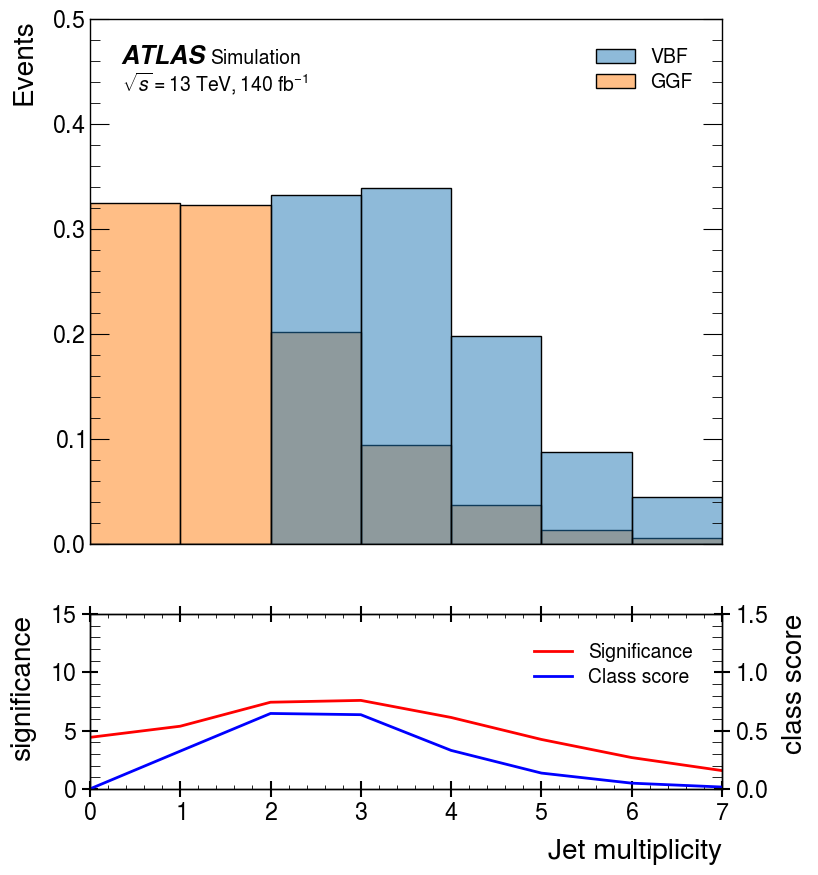

detajj


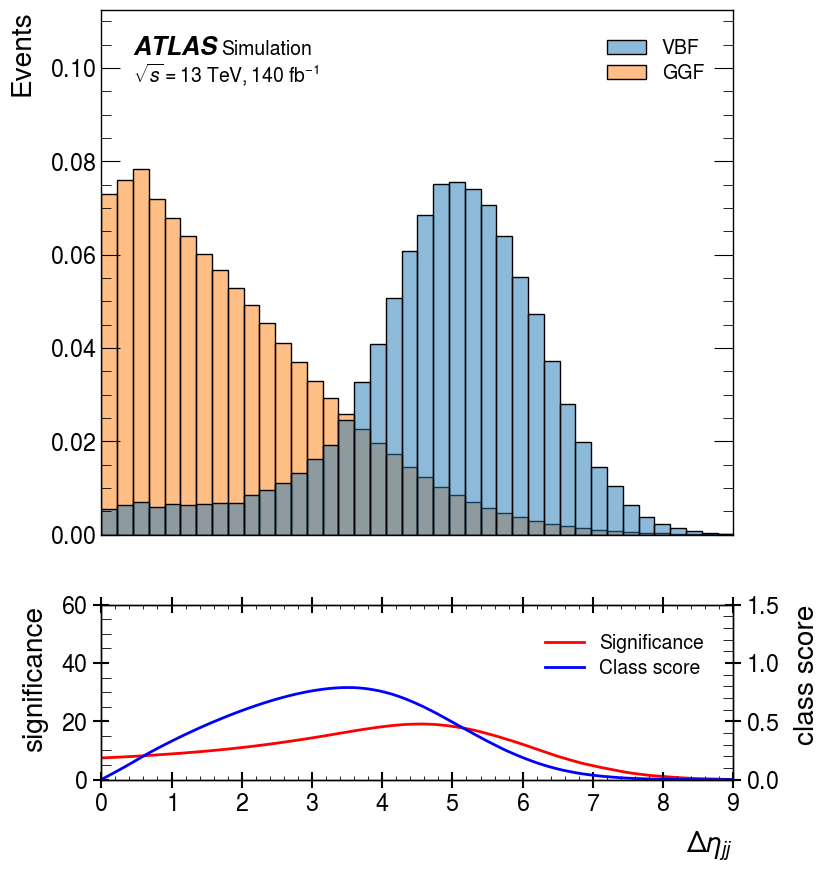

mjj


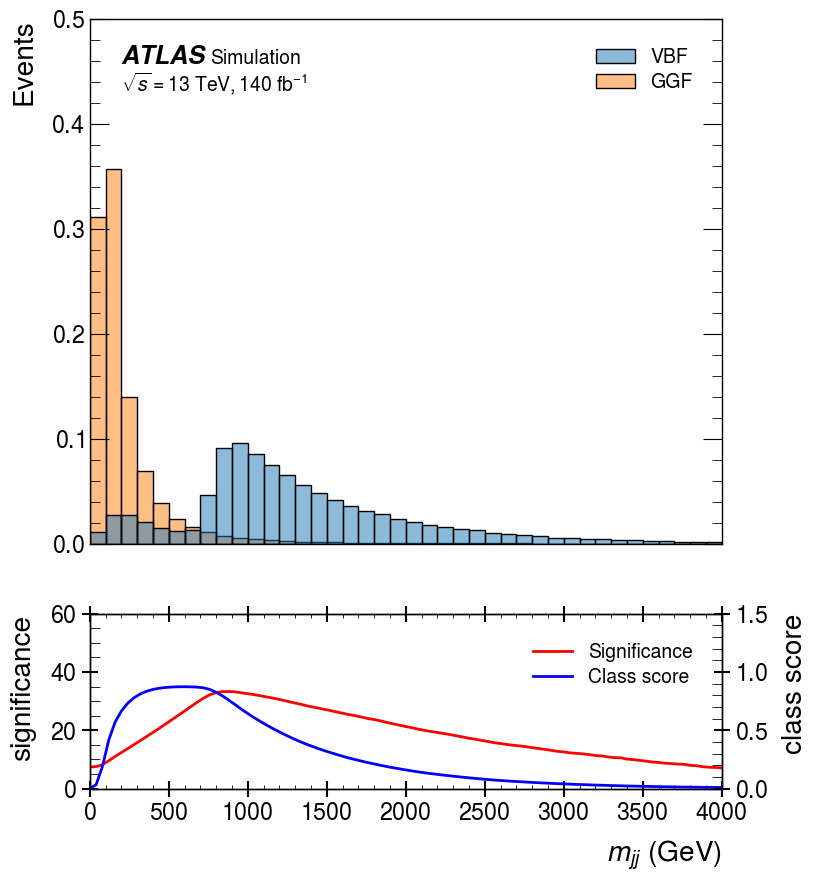

MET


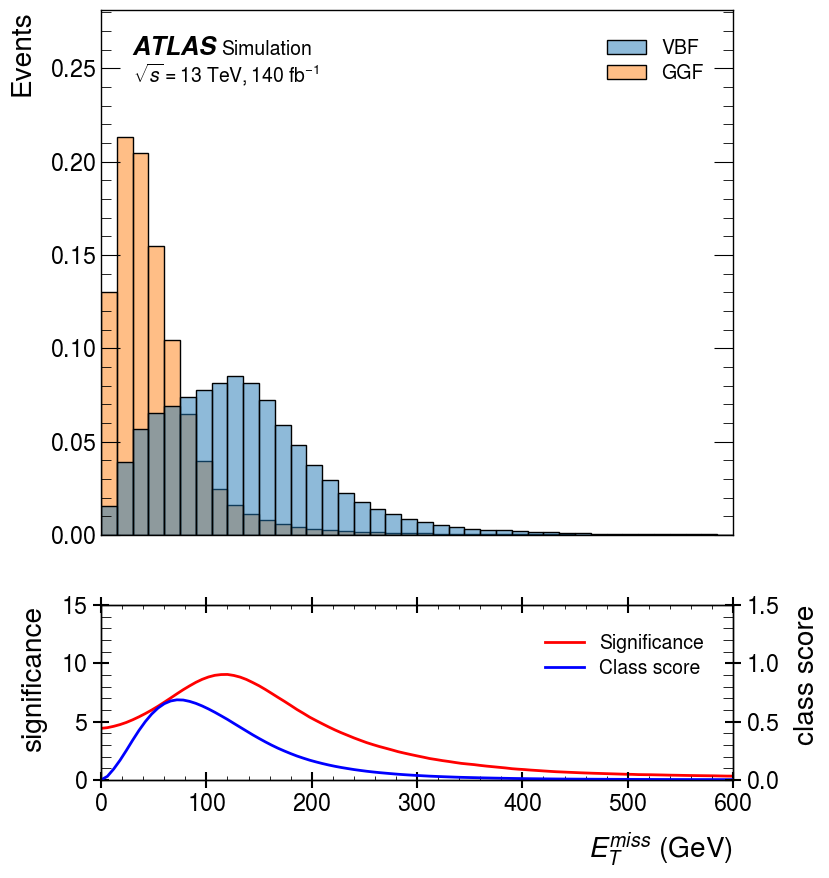

dphijj


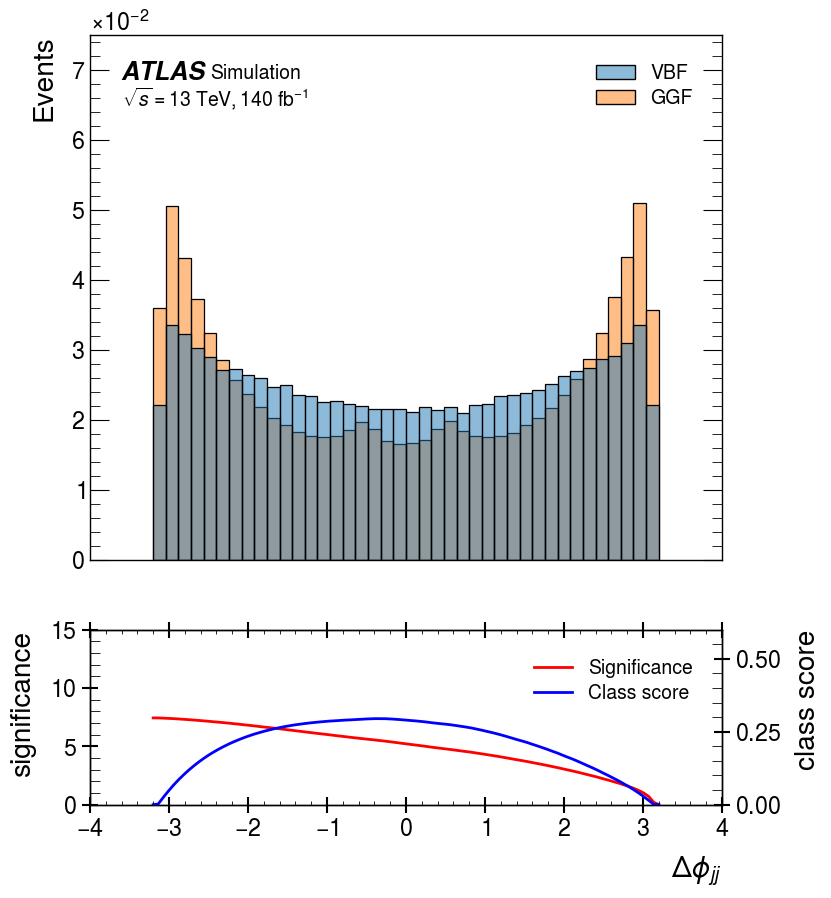

centrality


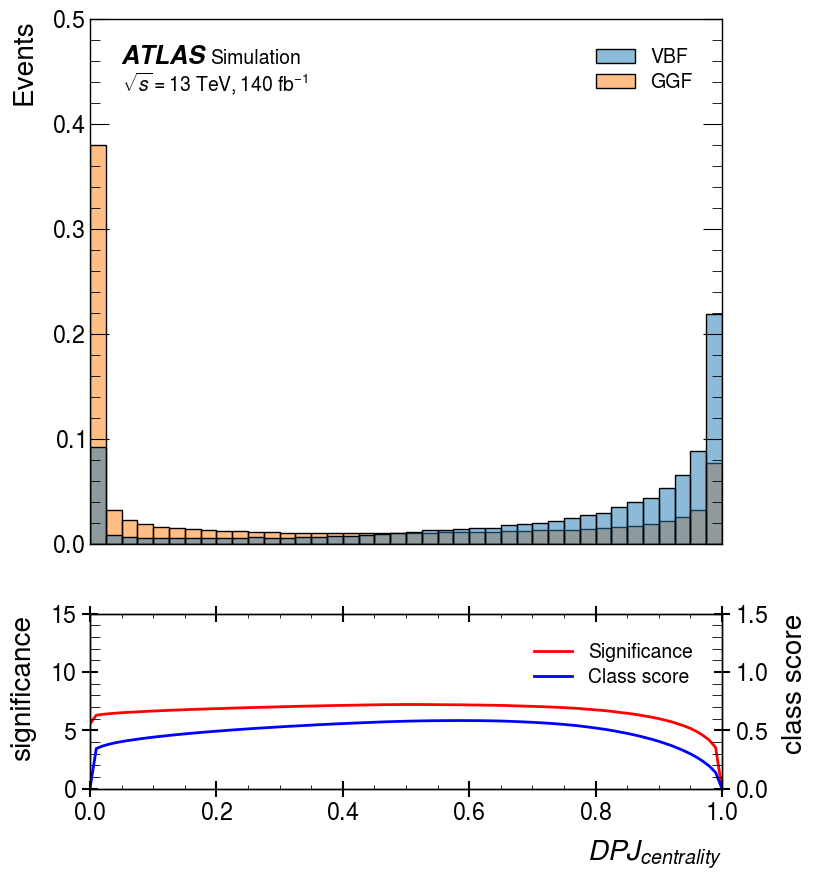

jet1_pt


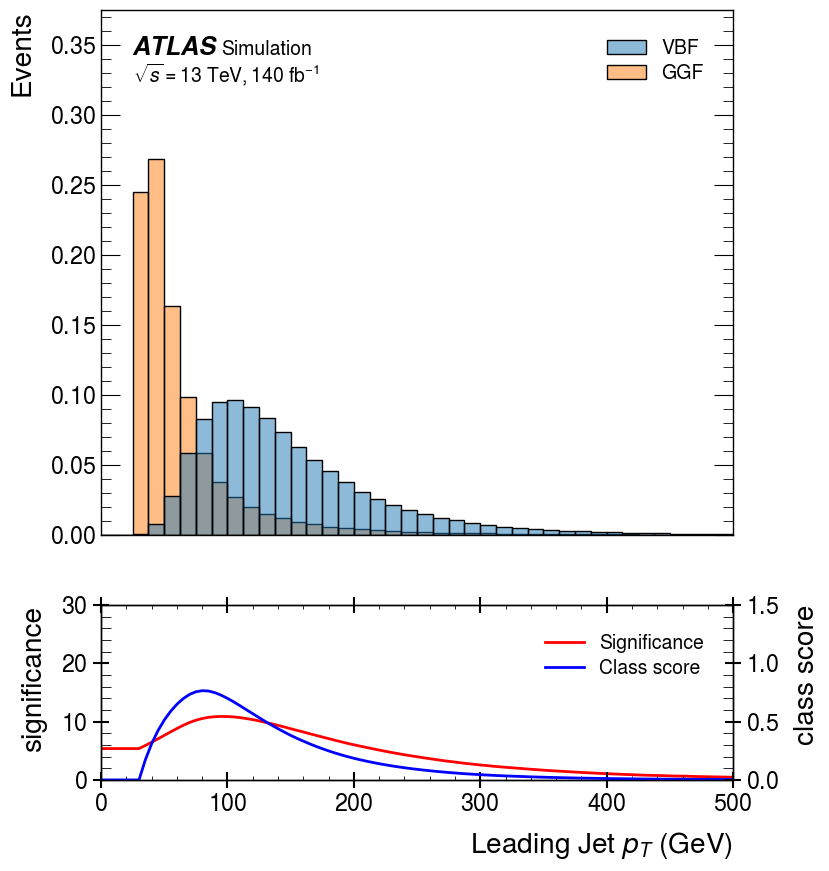

jet2_pt


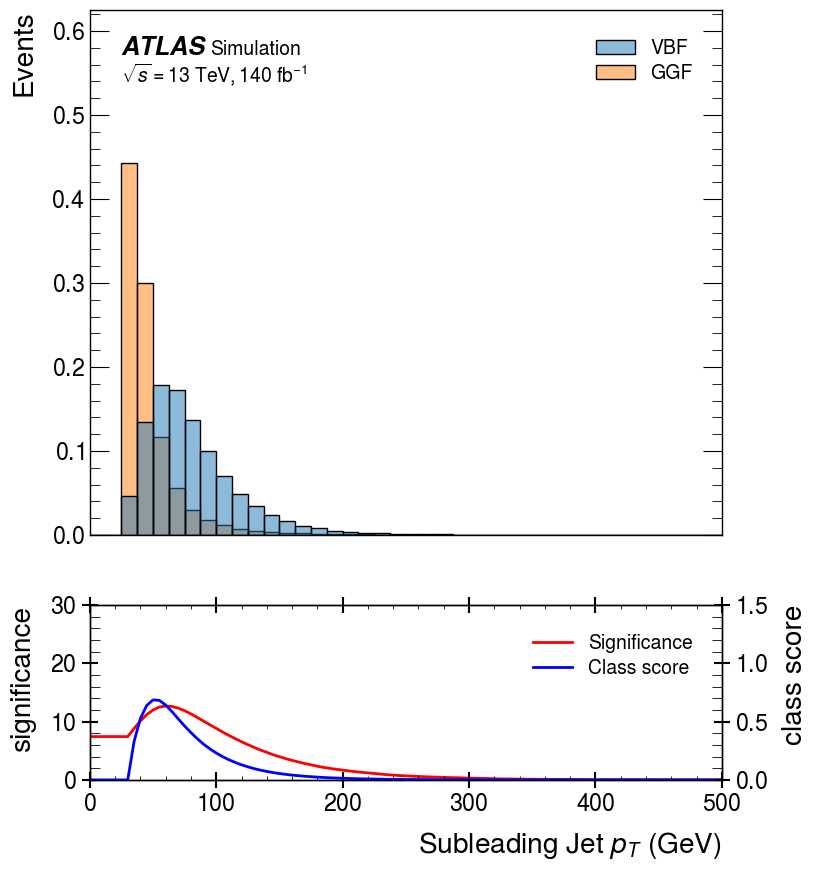

jet1_e


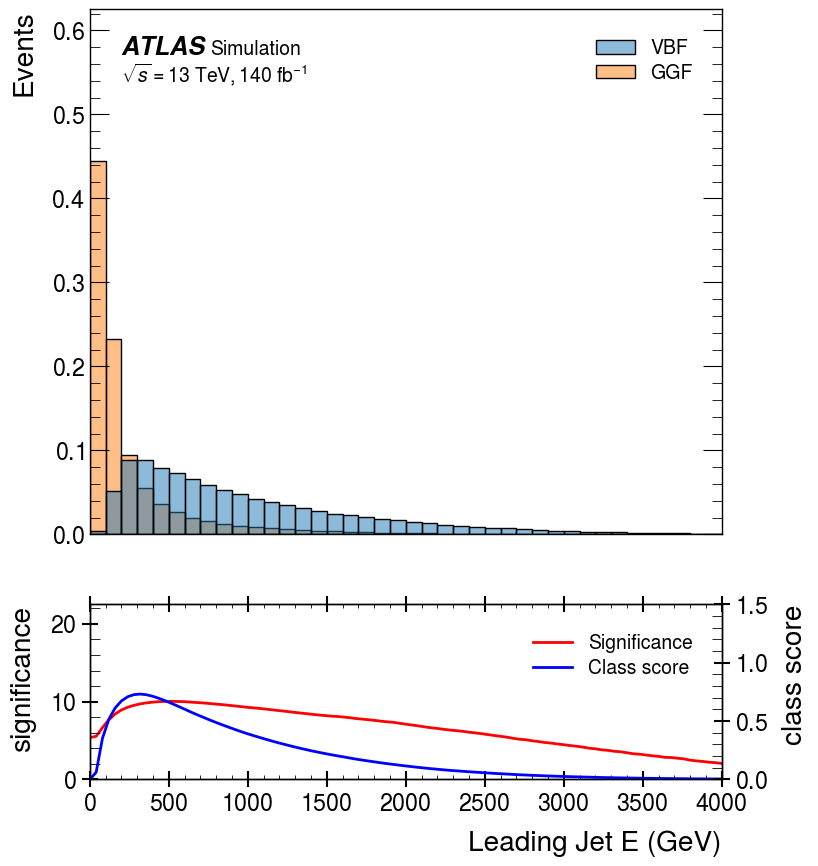

jet2_e


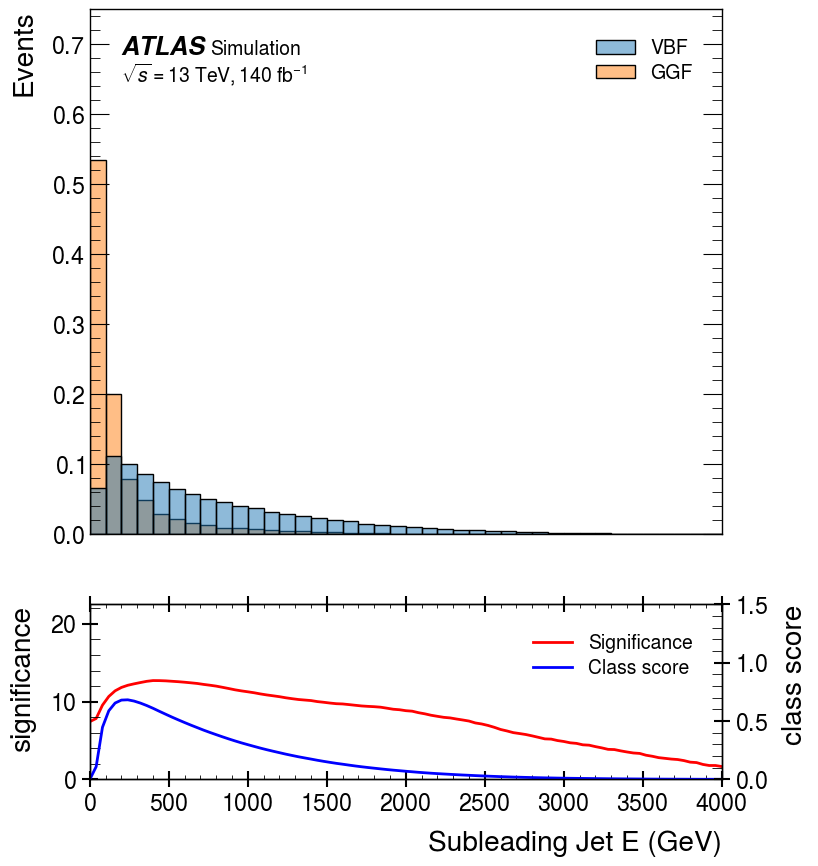

jet1_eta


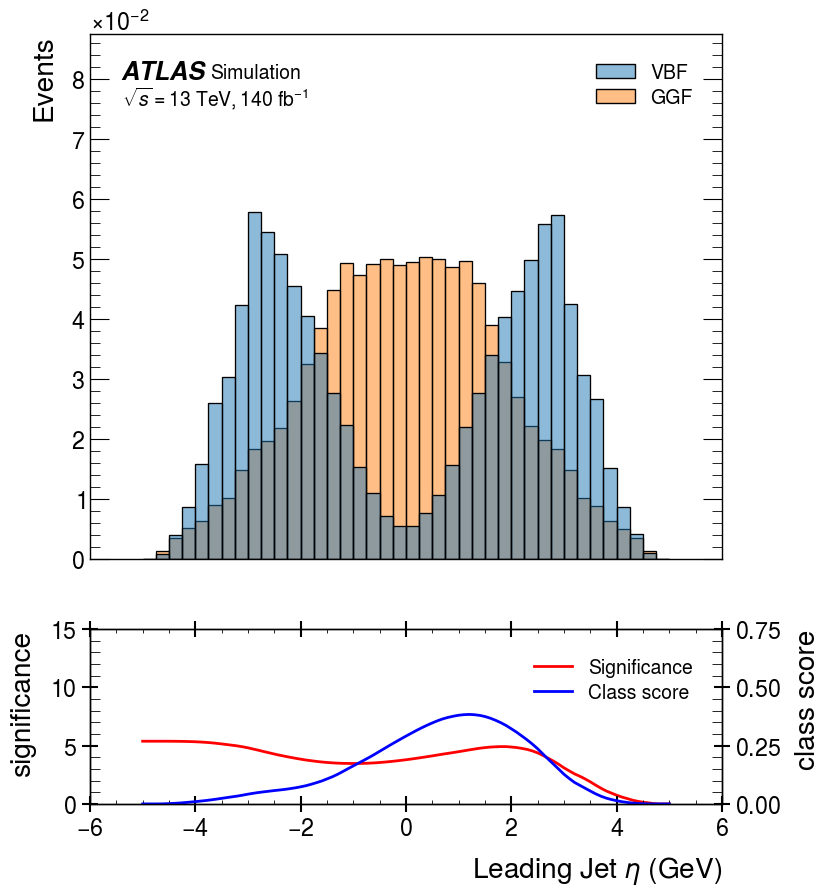

jet2_eta


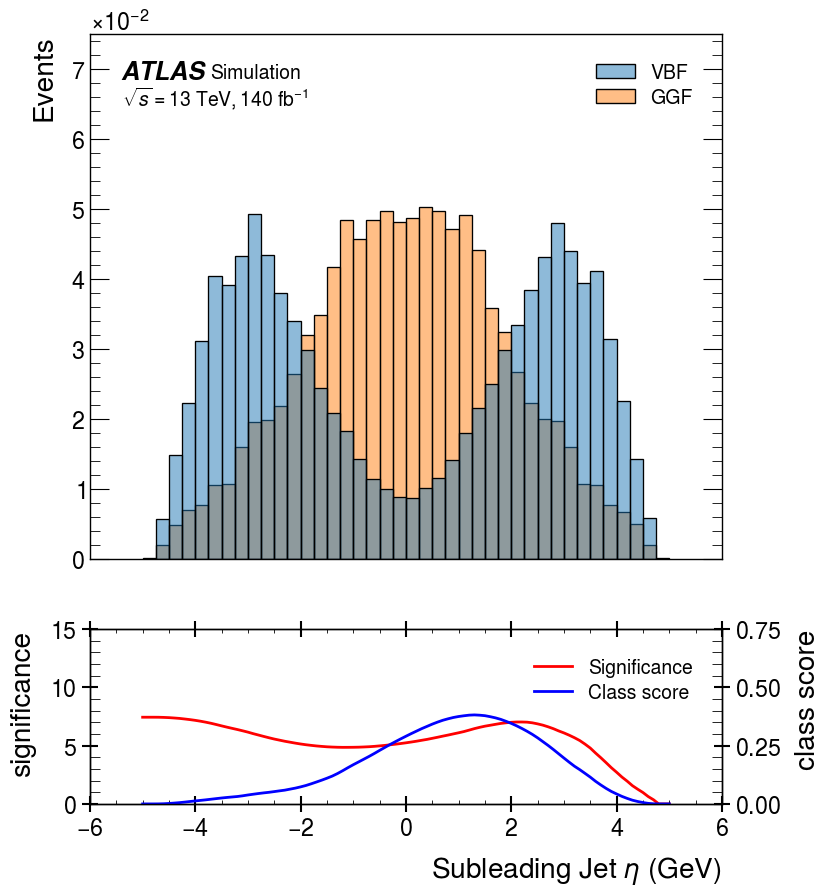

jet1_phi


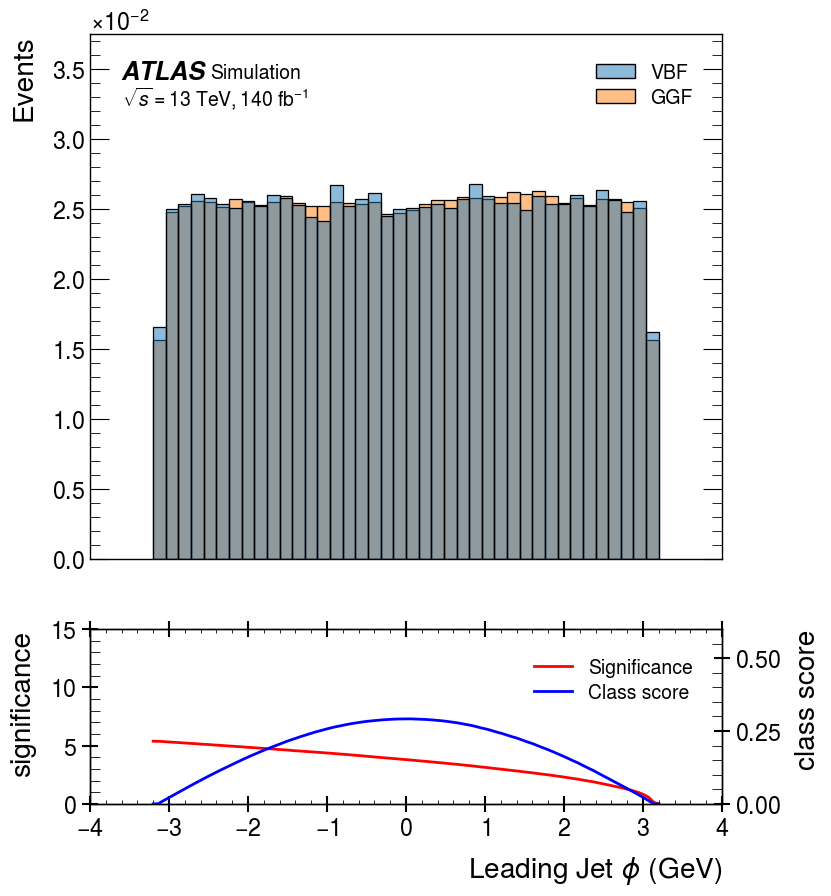

jet2_phi


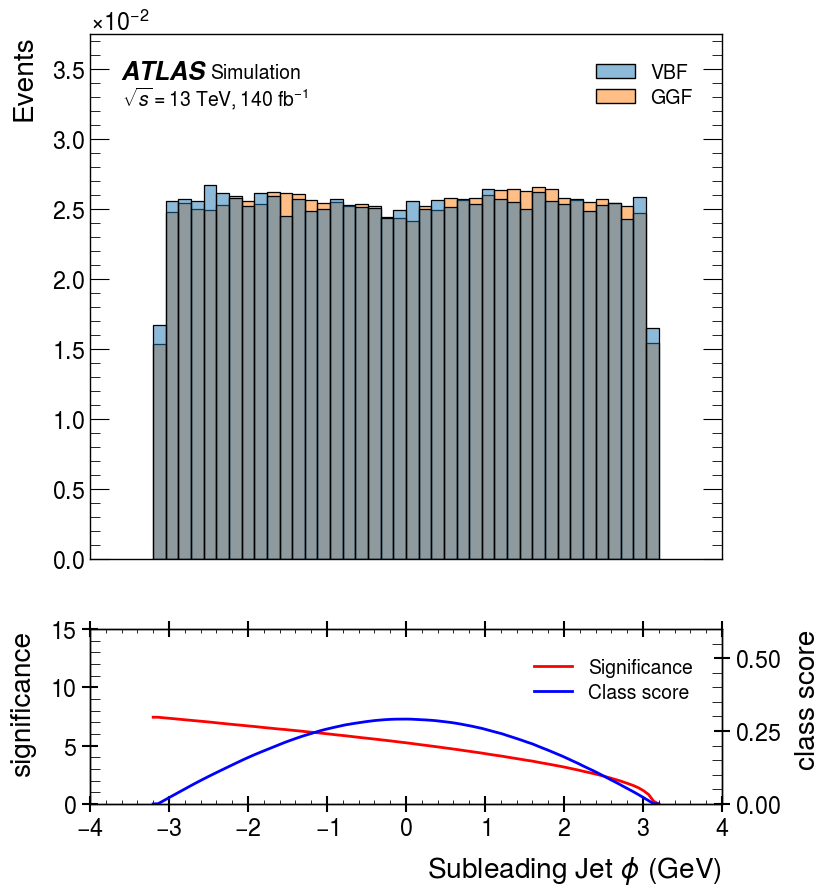

In [20]:
for dist in plot_var2:
    n_bins = 40
    print(dist)
    if dist == 'njet30':
        bin_range = (0, 7)
        n_bins = 7
        df_var = df_njet30_t1
        label = 'Jet multiplicity'
    elif dist == 'detajj':
        bin_range = r_detajj
        bin_width = 0.1
        df_var = df_detajj_t1
        label = '$\Delta\eta_{jj}$'
        #label = 'deta jj'
    if dist == 'mjj':
        bin_range = r_mjj
        bin_width = 50
        df_var = df_mjj_t1
        label = '$m_{jj}$ (GeV)'
    #elif dist == 'metTrig':
    #    bin_range = (0, 3)
    #    bin_width = 1
    elif dist == "MET":
        bin_range = r_met
        bin_width = 10
        df_var = df_met_t1
        label = '$E_{T}^{miss}$ (GeV)'
    # elif dist == 'neleSignal':
    #     bin_range = (0, 3)
    #     bin_width = 1
    #     df_var = df_nele_t1
    #     label = 'electron multiplicity'
    # elif dist == 'nmuSignal':
    #     bin_range = (0, 3)
    #     bin_width = 1
    #     df_var = df_nmu_t1
    #     label = 'muon multiplicity'
    # elif dist == 'nLJmus20':
    #     bin_range = (0, 2)
    #     bin_width = 1
    #     df_var = df_nLJmus20_t1
    #     label = '$\mu$DPJ multiplicity'
    # elif dist == 'nLJjets20':
    #     bin_range = (0, 6)
    #     bin_width = 1
    #     df_var = df_nLJjets20_t1
    #     label = 'caloDPJ multiplicity'
    # elif dist == 'LJjet1_gapRatio':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_LJjet1_gapRatio_t1
    #     label = 'gap ratio'
    # elif dist == 'min_dphi_jetmet':
    #     bin_range = (0, 3.2)
    #     bin_width = 0.01
    #     df_var = df_min_dphi_jetmet_t1
    #     label = '$\Delta\phi_{j,MET}$'
    elif dist == 'dphijj':
        bin_range = (-3.2, 3.2)
        bin_width = 0.1
        df_var = df_dphijj_t1
        label = '$\Delta\phi_{jj}$'
    elif dist == 'centrality':
        bin_range = (0, 1)
        bin_width = 0.01
        df_var = df_centrality_t1
        label = '$DPJ_{centrality}$'
    elif dist == 'jet1_pt':
        bin_range = r_jet1_pt
        bin_width = 0.01
        df_var = df_jet1_pt_t1
        label = 'Leading Jet $p_{T}$ (GeV)'
    elif dist == 'jet2_pt':
        bin_range = r_jet2_pt
        bin_width = 0.01
        df_var = df_jet2_pt_t1
        label = 'Subleading Jet $p_{T}$ (GeV)'
    elif dist == 'jet1_e':
        bin_range = r_jet1_e
        bin_width = 0.01
        df_var = df_jet1_e_t1
        label = 'Leading Jet E (GeV)'
    elif dist == 'jet2_e':
        bin_range = r_jet2_e
        bin_width = 0.01
        df_var = df_jet2_e_t1
        label = 'Subleading Jet E (GeV)'
    elif dist == 'jet1_eta':
        bin_range = r_jet_eta
        df_var = df_jet1_eta_t1
        label = 'Leading Jet $\eta$ (GeV)'
    elif dist == 'jet2_eta':
        bin_range = r_jet_eta
        df_var = df_jet2_eta_t1
        label = 'Subleading Jet $\eta$ (GeV)'
    elif dist == 'jet1_phi':
        bin_range = r_jet_phi
        df_var = df_jet1_phi_t1
        label = 'Leading Jet $\phi$ (GeV)'
    elif dist == 'jet2_phi':
        bin_range = r_jet_phi
        df_var = df_jet2_phi_t1
        label = 'Subleading Jet $\phi$ (GeV)'
    # elif dist == 'LJjet1_BIBtagger':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_bib_t1
    #     label = 'BIB tagger'
    # elif dist == 'LJjet1_jvt':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_jvt_t1
    #     label = 'JVT tagger'
    # elif dist == 'LJjet1_DPJtagger':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_dpj_t1
    #     label = 'QCD tagger'
    # elif dist == 'LJjet1_isoID':
    #     bin_range = (0, 100)
    #     bin_width = 1
    #     df_var = df_LJjet1_isoID_t1
    #     label = 'isoID (GeV)'

    f, axes = plt.subplots(2,1, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})

    ax1 = sns.histplot(
        df_test,
        x=dist,
        hue='sample',
        binrange = bin_range,
        # binwidth = bin_width,
        bins = n_bins,
        weights='weight',
        stat="probability", common_norm=False,
        # stat='count', #could be count, probability, density, or probability density
        log_scale=(False, False),
        #dont show legend name
        legend=True,
        alpha=0.5,
        ax = axes[0]
    )
    # add a subplot with the significance below the histplot
    ax2 = sns.lineplot(
        df_var,
        x=dist,
        y='significance',
        color='red',
        ax = axes[1],
        label = "Significance",
        legend=False
    )
    axt = axes[1].twinx()
    ax3 = sns.lineplot(
        df_var,
        x=dist,
        y='class score',
        color='blue',
        ax = axt,
        label = "Class score",
        legend=False
    )

    lines, labels = axes[1].get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc="upper right")

    # remove x label from ax1
    ax1.set_xlabel('')
    # remove number in x axis from ax1
    ax1.set_xticks([])
    ## set y label name according to bin width
    ax1.set_ylabel("Events")
    # set x label name
    ax2.set_xlabel(label)
    ## removing legend title
    ax1.legend_.set_title(None)
    # set legend location
    sns.move_legend(ax1, "upper right")
    #print hep.atlas.label in ax1
    hep.atlas.label('Simulation', data=True, lumi=140, year=2018, ax=ax1)
    #increase vertical size of ax1
    # ax1.set_ylim(top=0.5)
    ax1.set_ylim(top=ax1.get_ylim()[1]*5/4)
    ax2.set_ylim(top=ax2.get_ylim()[1]*3/2, bottom=0)
    ax3.set_ylim(top=ax3.get_ylim()[1]*3/2, bottom=0)
    tkw = dict(length=12, width=1.5, direction="inout")
    ax2.tick_params(axis='y', **tkw)
    ax3.tick_params(axis='y', **tkw)
    ax2.tick_params(axis='x', **tkw)
    plt.show()

In [21]:
# all bkg together

In [22]:
# df_sgn_jvt = pd.DataFrame()
# df_bkg_jvt = pd.DataFrame()
# #df_sgn_jvt = df_jvt_t1['LJjet1_jvt', 'signal', 'significance']

In [23]:
# df_sgn_jvt['LJjet1_jvt'] = df_jvt_t1['LJjet1_jvt']
# df_sgn_jvt['yield'] = df_jvt_t1['signal']
# df_sgn_jvt['sample'] = 'VBF 0.1GeV, 15mm'

# df_bkg_jvt['LJjet1_jvt'] = df_jvt_t1['LJjet1_jvt']
# df_bkg_jvt['yield'] = df_jvt_t1['background']
# df_bkg_jvt['sample'] = 'All bkg'


In [24]:
# df_sgn_jvt

In [25]:
# df_jvt_all = [df_sgn_jvt, df_bkg_jvt]

In [26]:
# combine all dataframes into one
# df_jvt = pd.concat(df_jvt_all)

In [27]:
# df_jvt

In [28]:
# ax1 = sns.histplot(
#     df_jvt,
#     x='LJjet1_jvt',
#     hue='sample',
#     #binrange = bin_range,
#     #binwidth = bin_width,
#     #weights='weight',
#     stat='count', #could be count, probability, density, or probability density
#     log_scale=(False, True),
#     #dont show legend name
#     legend=True,
#     alpha=0.5,
#     #ax = axes[0]
)

SyntaxError: unmatched ')' (443504619.py, line 14)